In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Alven speed = V0 at r = rs
def Valfven(r, Vs, rs, usw):
    Omega = 2.8e-6 # /s
    VA = Vs * (rs/r) * np.sqrt(1 + (Omega * (r - rs**2/r)/usw)**2)
    return VA

# VA_model(r) - VA_obs(r)
def VA_VAr(rs, usw, r, VAr):
    VA = Valfven(r, usw, rs, usw)
    return VA - VAr

# VA_model(r) - VA_obs(r), fix rs, vary Vs
def VA_VAr_vs(Vs, rs, usw, r, VAr):
    VA = Valfven(r, Vs, rs, usw)
    return VA - VAr

def Br_Bs(r, rs, usw):
    Omega = 2.8e-6 #/s
    Bmag = (rs/r)**2 * np.sqrt(1 + (Omega * (r - rs**2/r)/usw)**2)
    return Bmag

# ratio tau_sw / tau_A
def Ta_sw(rs, r, Ls, usw, VAs):
    Omega = 2.8e-6 # /s
    r_rs = r/rs
    LA = quad(Valfven, rs, r, args=(VAs, rs, usw))[0]/usw
    return LA / (Ls * r_rs**1.0)

# ratio tau_sw / tau_A, test
def Valfven_L(r, Vs, rs, usw, Ls):
    Omega = 2.8e-6 # /s
    VA = Vs * (rs/r) * np.sqrt(1 + (Omega * (r - rs**2/r)/usw)**2)
    L = Ls*(r/rs)
    return VA/L

def Ta_sw1(rs, r, Ls, usw, VAs):
    Omega = 2.8e-6 # /s
    return quad(Valfven_L, rs, r, args=(VAs, rs, usw, Ls))[0]/usw

# distance traveled by Alfven waves
def LA(rs, r, usw, VAs):
    Omega = 2.8e-6 # /s
    LA = quad(Valfven, rs, r, args=(VAs, rs, usw))[0]/usw
    return LA

In [3]:
# parameters
mp = 1.67e-24  # g
AU = 1.5e13    # cm
Rs = 6.97e10   # cm
Rs_AU = Rs/AU  # solar radius in au
nT_Gs = 1.0e-5 # nT / Gs
kms = 1.0e5    # cm/s
km = 1.0e5     # cm
eV = 1.6e-12   # erg
keV = 1e3*eV

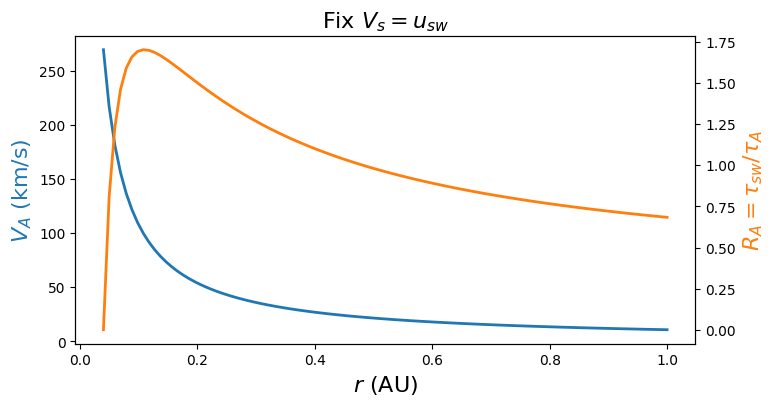

In [4]:
# Figure 1: Alfven speed and time-scale ratio
rs = 0.04    # AU
VAs = 2.7e7  # cm/s
usw = 2.7e7  # cm/s
Ls = 1.3e11  # cm
r = np.linspace(0.04, 1, 100)  # in AU
VA = Valfven(r, VAs, rs, usw)
Nalf = np.zeros_like(r)
Nalf1 = np.zeros_like(r)

for i in range(0, 100):
    Nalf[i] = Ta_sw(rs*AU, r[i]*AU, Ls, usw, VAs)
    Nalf1[i] = Ta_sw1(rs*AU, r[i]*AU, Ls, usw, VAs)

fig = plt.figure(figsize=(8,4))
ax = plt.gca()
ax.plot(r, VA/1.0e5, lw=2, color='C0')
ax.set_xlabel(r'$r$ (AU)', fontsize=16)
ax.set_ylabel(r'$V_A$ (km/s)', color='C0', fontsize=16)

ax1 = ax.twinx()
ax1.plot(r, Nalf, lw=2, color='C1')
# ax1.plot(r, Nalf1, lw=2, color='C1')
ax1.set_ylabel(r'$R_A = \tau_{sw}/\tau_A$', color='C1', fontsize=16)
plt.title(r"Fix $V_s = u_{sw}$", fontsize=16)
# plt.savefig('./RVA_short.png', bbox_inches='tight', dpi=300)
plt.show()

In [5]:
# PSP event parameters
location_psp = np.array([  62.9,  107.2,   72.5,   36.5,   29.5,   30.1,   20.0,   16.0])  # Rs
width_km_psp = np.array([1.47e5, 4.64e4, 2.45e4, 1.81e3, 1.05e3, 3.99e4, 9.14e3, 2.98e4])
reconnect_psp = np.array([True, True, True, True, True, False, True, True])
colors_psp = np.array(['C0', 'C0', 'C0', 'C0', 'C0', 'C1', 'C0', 'C0'])
mk0_psp = np.array(['.', '.', '.', '.', '.', 'x', '.', '.'])
Bmag_psp_1 = np.array([ 32.1,  14.4,   9.6,  43.6,   51.7,   78.6,  276.3,  402.3])
Bmag_psp_2 = np.array([ 25.0,  15.8,   9.2,  48.0,   35.6,   40.0,  238.3,  307.2])
nden_psp_1 = np.array([121.0,  42.0,  76.0, 612.0,  944.0, 1145.0, 1603.0, 2479.0])
nden_psp_2 = np.array([215.0,  52.0,  77.0, 597.0, 1163.0, 1147.0, 2811.0, 4245.0])
usw_psp_1 = np.array([ 320.0, 355.0, 275.0, 276.0,  235.0,  235.0,  258.0,  211.0])
usw_psp_2 = np.array([ 349.0, 370.0, 277.0, 271.0,  242.0,  260.0,  239.0,  219.0])
VA_psp_1 = Bmag_psp_1*nT_Gs/np.sqrt(4*np.pi*nden_psp_1*mp)  # cm/s
VA_psp_2 = Bmag_psp_2*nT_Gs/np.sqrt(4*np.pi*nden_psp_2*mp)  # cm/s

In [6]:
VA_psp_1/kms, VA_psp_2/kms

(array([ 63.7014297 ,  48.50367881,  24.03816264,  38.47225216,
         36.73172958,  50.70568278, 150.64369382, 176.37970082]),
 array([ 37.21839246,  47.82910426,  22.88649554,  42.8835672 ,
         22.78751529,  25.78191159,  98.1138803 , 102.92460204]))

In [7]:
# ACE event parameters
width_km_ace = np.array([3.42e5, 1.07e5, 1.25e6, 6.49e4, 1.22e5, 1.28e6, 4.12e5, 2.74e5])
reconnect_ace = np.array([False, True, False, True, True, False, True, True])
colors_ace = np.array(['C1', 'C0', 'C1', 'C0', 'C0', 'C1', 'C0', 'C0'])
mk0_ace = np.array(['x', '^', 'x', '^', '^', 'x', '^', '^'])
Bmag_ace_1 = np.array([ 9.1, 8.8,  9.4,  8.6,  3.7, 13.2, 14.3, 8.4])
Bmag_ace_2 = np.array([ 8.5, 8.9, 12.7, 10.3,  6.9, 14.5, 17.5, 8.8])
nden_ace_1 = np.array([8.4, 11.2, 26.5, 18.0, 14.2,  5.8, 28.2, 5.5])
nden_ace_2 = np.array([7.1,  6.3, 22.4, 13.3,  7.6, 11.1, 13.7, 6.4])
usw_ace_1 = np.array([355.0, 295, 370, 323.0,  389,  512,  356, 354])
usw_ace_2 = np.array([389.0, 314, 438, 344.0,  414,  568,  404, 395])
VA_ace_1 = Bmag_ace_1*nT_Gs/np.sqrt(4*np.pi*nden_ace_1*mp)  # cm/s
VA_ace_2 = Bmag_ace_2*nT_Gs/np.sqrt(4*np.pi*nden_ace_2*mp)  # cm/s

In [8]:
VA_ace_1/1.0e5, VA_ace_2/1.0e5

(array([ 68.5391291 ,  57.39981507,  39.86040886,  44.24854872,
         21.43356362, 119.64560961,  58.78253562,  78.18704032]),
 array([ 69.63484028,  77.40278093,  58.5755728 ,  61.65215146,
         54.63602902,  95.00431813, 103.20829356,  75.93281799]))

In [9]:
# calculate maximum lengths allowed by causality with uncertainty (PSP)
rs_psp_1 = np.zeros_like(usw_psp_1)
leng_psp_1 = np.zeros_like(usw_psp_1)
rs_psp_2 = np.zeros_like(usw_psp_2)
leng_psp_2 = np.zeros_like(usw_psp_2)

for i in range(8):
    rs_psp_1[i] = fsolve(VA_VAr, 0.04*AU, args=(usw_psp_1[i]*kms, location_psp[i]*Rs, VA_psp_1[i]))[0]
    leng_psp_1[i] = LA(rs_psp_1[i], location_psp[i]*Rs, usw_psp_1[i]*kms, usw_psp_1[i]*kms)
    rs_psp_2[i] = fsolve(VA_VAr, 0.04*AU, args=(usw_psp_2[i]*kms, location_psp[i]*Rs, VA_psp_2[i]))[0]
    leng_psp_2[i] = LA(rs_psp_2[i], location_psp[i]*Rs, usw_psp_2[i]*kms, usw_psp_2[i]*kms)

# aspect ratio
aspr_psp_1 = width_km_psp*km/leng_psp_1
aspr_psp_2 = width_km_psp*km/leng_psp_2

In [10]:
rs_psp_1/AU, rs_psp_2/AU, aspr_psp_1, aspr_psp_2

(array([0.05456271, 0.05884455, 0.02621802, 0.02291717, 0.02083735,
        0.02935203, 0.05399239, 0.06208584]),
 array([0.029436  , 0.05622406, 0.0248155 , 0.02599567, 0.01256276,
        0.01353429, 0.03780136, 0.034726  ]),
 array([0.01052822, 0.00237934, 0.00238375, 0.00026122, 0.00017717,
        0.00576298, 0.00207488, 0.01774936]),
 array([0.01433111, 0.00244535, 0.00246705, 0.00024565, 0.0002319 ,
        0.00837394, 0.00178698, 0.00750084]))

In [11]:
# calculate maximum lengths allowed by causality (ACE)
rs_ace_1 = np.zeros_like(usw_ace_1)
leng_ace_1 = np.zeros_like(usw_ace_1)
rs_ace_2 = np.zeros_like(usw_ace_2)
leng_ace_2 = np.zeros_like(usw_ace_2)

for i in range(8):
    if np.isnan(nden_ace_1[i]):  # assume density = 10/cc
        VA_ace_1[i] = Bmag_ace_1[i]*nT_Gs/np.sqrt(4*np.pi*10.0*mp)
    rs_ace_1[i] = fsolve(VA_VAr, 0.04*AU, args=(usw_ace_1[i]*kms, 213.5*Rs, VA_ace_1[i]))[0]
    leng_ace_1[i] = LA(rs_ace_1[i], 213.5*Rs, usw_ace_1[i]*kms, usw_ace_1[i]*kms)
    if np.isnan(nden_ace_2[i]):  # assume density = 10/cc
        VA_ace_2[i] = Bmag_ace_2[i]*nT_Gs/np.sqrt(4*np.pi*10.0*mp)
    rs_ace_2[i] = fsolve(VA_VAr, 0.04*AU, args=(usw_ace_2[i]*kms, 213.5*Rs, VA_ace_2[i]))[0]
    leng_ace_2[i] = LA(rs_ace_2[i], 213.5*Rs, usw_ace_2[i]*kms, usw_ace_2[i]*kms)

# aspect ratio
aspr_ace_1 = width_km_ace*km/leng_ace_1
aspr_ace_2 = width_km_ace*km/leng_ace_2

In [12]:
rs_ace_1/AU, rs_ace_2/AU, aspr_ace_1, aspr_ace_2

(array([0.1253732 , 0.11250214, 0.07116929, 0.08363587, 0.0373307 ,
        0.18223518, 0.10712873, 0.14361035]),
 array([0.12217739, 0.14932802, 0.09655904, 0.1140921 , 0.09268557,
        0.13465747, 0.17942165, 0.1324433 ]),
 array([0.00780588, 0.00248915, 0.04038469, 0.00184454, 0.00617002,
        0.02582638, 0.01027912, 0.00581823]),
 array([0.00805331, 0.00216798, 0.03428548, 0.00155114, 0.00340147,
        0.03010498, 0.00807828, 0.00619499]))

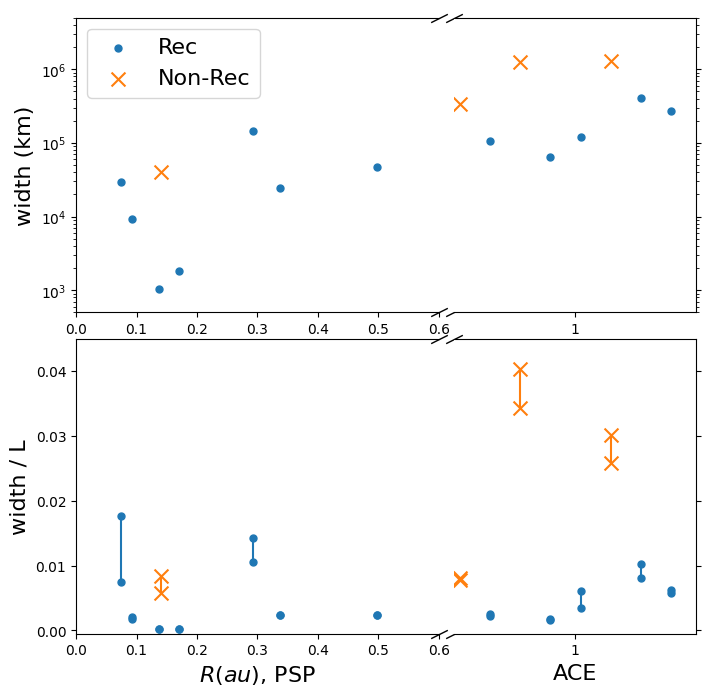

In [13]:
# combine aspect ratio and time ratio
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'width_ratios': [3, 2]})
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.09)

# fake location for ACE
location_ace = (np.arange(8)-3.5)*7 + 213

for i in range(8):
    if (reconnect_psp[i] and i==0):
        ax3.scatter(location_psp[i]*Rs_AU, aspr_psp_1[i], marker='.', s=100, color='C0')
        ax3.scatter(location_psp[i]*Rs_AU, aspr_psp_2[i], marker='.', s=100, color='C0')
        ax3.plot(np.array([location_psp[i]*Rs_AU, location_psp[i]*Rs_AU]),
                 np.array([aspr_psp_1[i], aspr_psp_2[i]]), color='C0')
        ax1.scatter(location_psp[i]*Rs_AU, width_km_psp[i], marker='.', s=100, color='C0', label="Rec")
        
    elif (reconnect_psp[i] and i!=0):
        ax3.scatter(location_psp[i]*Rs_AU, aspr_psp_1[i], marker='.', s=100, color='C0')
        ax3.scatter(location_psp[i]*Rs_AU, aspr_psp_2[i], marker='.', s=100, color='C0')
        ax3.plot(np.array([location_psp[i]*Rs_AU, location_psp[i]*Rs_AU]),
                 np.array([aspr_psp_1[i], aspr_psp_2[i]]), color='C0')
        ax1.scatter(location_psp[i]*Rs_AU, width_km_psp[i], marker='.', s=100, color='C0')
    else:
        ax3.scatter(location_psp[i]*Rs_AU, aspr_psp_1[i], marker='x', s=100, color='C1')
        ax3.scatter(location_psp[i]*Rs_AU, aspr_psp_2[i], marker='x', s=100, color='C1')
        ax3.plot(np.array([location_psp[i]*Rs_AU, location_psp[i]*Rs_AU]),
                 np.array([aspr_psp_1[i], aspr_psp_2[i]]), color='C1')
        ax1.scatter(location_psp[i]*Rs_AU, width_km_psp[i], marker='x', s=100, color='C1', label="Non-Rec")

for i in range(8):
    if (reconnect_ace[i]):
        ax4.scatter(location_ace[i]*Rs_AU, aspr_ace_1[i], marker='.', s=100, color='C0')
        ax4.scatter(location_ace[i]*Rs_AU, aspr_ace_2[i], marker='.', s=100, color='C0')
        ax4.plot(np.array([location_ace[i]*Rs_AU, location_ace[i]*Rs_AU]),
                 np.array([aspr_ace_1[i], aspr_ace_2[i]]), color='C0')
        ax2.scatter(location_ace[i]*Rs_AU, width_km_ace[i], marker='.', s=100, color='C0')
    else:
        ax4.scatter(location_ace[i]*Rs_AU, aspr_ace_1[i], marker='x', s=100, color='C1')
        ax4.scatter(location_ace[i]*Rs_AU, aspr_ace_2[i], marker='x', s=100, color='C1')
        ax4.plot(np.array([location_ace[i]*Rs_AU, location_ace[i]*Rs_AU]),
                 np.array([aspr_ace_1[i], aspr_ace_2[i]]), color='C1')
        ax2.scatter(location_ace[i]*Rs_AU, width_km_ace[i], marker='x', s=100, color='C1')

ax1.set_xlim(0, 0.6)
ax3.set_xlim(0, 0.6)
ax2.set_xlim(0.87, 1.13)
ax4.set_xlim(0.87, 1.13)

ax3.set_ylim(-0.0005, 0.045)
ax4.set_ylim(-0.0005, 0.045)
ax1.set_ylim(5e2, 5e6)
ax2.set_ylim(5e2, 5e6)
ax1.set_yscale('log')
ax2.set_yscale('log')

# hide the spines between ax1 and ax2
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.yaxis.tick_right()
ax4.tick_params(labelright=False)  # don't put tick labels on the right
ax4.set_xticks([1.0])
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
ax2.tick_params(labelright=False)  # don't put tick labels on the right
ax2.set_xticks([1.0])

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax2.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax1.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
ax4.plot([1, 1], [0, 1], transform=ax3.transAxes, **kwargs)
ax3.plot([0, 0], [0, 1], transform=ax4.transAxes, **kwargs)

ax3.set_xlabel(r'$R (au)$, PSP', fontsize=16)
ax4.set_xlabel('ACE', fontsize=16)
ax3.set_ylabel(r'width / L', fontsize=16)
ax1.set_ylabel(r'width (km)', fontsize=16)
ax1.legend(loc='upper left', fontsize=16)

# plt.savefig("./combined_events.png", dpi=300, bbox_inches='tight')

In [14]:
# Energy conversion
def Bmag(r, rs, usw, Bs):
    Omega = 2.8e-6 #/s
    Bmag = Bs * (rs/r)**2 * np.sqrt(1 + (Omega * (r - rs**2/r)/usw)**2)
    return Bmag

def tmp_integ(r, rs, usw, Bs, Vs, rate):
    B2r = Bmag(r, rs, usw, Bs)**2
    Vrec = Valfven(r, Vs, rs, usw) * rate
    return B2r * Vrec / (4*np.pi * usw)

def energy_V(rs, r, usw, Bs, Vs, theta):
    rate = 0.01
    foo = quad(tmp_integ, rs, r, args=(rs, usw, Bs, Vs, rate))
    return foo[0] / (theta*r)

def energy_S(r, rs, usw, Bs, Vs):
    rate = 0.01
    foo = quad(tmp_integ, rs, r, args=(rs, usw, Bs, Vs, rate))
    return foo[0]

def tmp_integ1(r, rs, usw, Bs, Vs, rate):
    B2r = Bmag(r, rs, usw, Bs)**2
    Vrec = Valfven(r, Vs, rs, usw) * rate
    return r * B2r * Vrec / (4*np.pi * usw)

def energy_S1(r, rs, usw, Bs, Vs):
    rate = 0.01
    foo = quad(tmp_integ1, rs, r, args=(rs, usw, Bs, Vs, rate))
    return foo[0]/r

rs = 0.04*AU
deltas = 1.3e9         # cm
VAs = 2.70e7           # cm/s
Bs = 1.4*(Rs/rs)**2    # G
ns = Bs**2 / (4*np.pi * VAs**2 * 1.67e-24)    # /cm^3
print(Bs, ns)
theta = 0.1
dmu = 1.0
dmuupper = np.cos(np.pi/2 - deltas / rs)
r = np.linspace(0.04, 1, 400)*AU
ro = r[-1]*10
VA = np.sqrt(r)
dEm = np.zeros(len(r))
dEmS = np.zeros(len(r))
epsm = np.zeros(len(r))
dEppp = np.zeros(len(r))
dEppp_up = np.zeros(len(r))
for i in range(0, 400):
    # L = deltas * np.sqrt(Sc) * r[i] / rs / Sc**0.375
    dEm[i] = energy_V(rs, r[i], usw, Bs, VAs, theta)
    dEmS[i] = energy_S1(r[i], rs, usw, Bs, VAs)
    epsm[i] = tmp_integ(r[i], rs, usw, Bs, VAs, 0.01)
    dEppp[i] = dEmS[i] / (2*dmu*ns*rs*rs/r[i])
    dEppp_up[i] = dEmS[i] / (2*dmuupper*ns*rs*rs/r[i])


0.01889257222222222 23330.72951601401


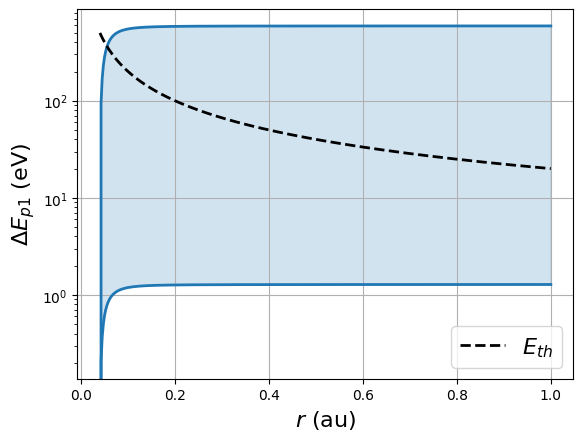

In [15]:
Eth = 20.0     # estimated thermal energy in eV per electron-proton pair at 1 au
dr = r[1] - r[0]
rmid = 0.5*(r[1:] + r[:-1])

fig = plt.figure()
plt.plot(r/AU, dEppp / eV, lw=2, color='C0')
plt.plot(r/AU, dEppp_up / eV, lw=2, color='C0')
plt.fill_between(r/AU, dEppp / eV, dEppp_up / eV, color='C0', alpha=0.2)
plt.plot(r/AU, Eth * (r/AU)**(-1.0), ls='--', lw=2, color='k', label=r"$E_{th}$")
plt.grid("on")
plt.xlabel(r'$r$ (au)', fontsize=16)
plt.ylabel(r"$\Delta E_{p1}$ (eV)", fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.yscale("log")
# plt.savefig('./energy3.png', bbox_inches='tight', dpi=300)
plt.show()